# 初始化

如果你完成了这个专业化的前一个课程，你可能按照我们的指导进行了权重初始化，并且到目前为止它已经成功了。但是，面对一个新的神经网络你究竟怎么选择初始化？在这个笔记中，你会看到不同的初始化会带来不同的结果。

精心选择的初始化可以：

- 加快梯度下降的收敛
- 增加梯度下降收敛到较低的训练（和泛化）错误的几率

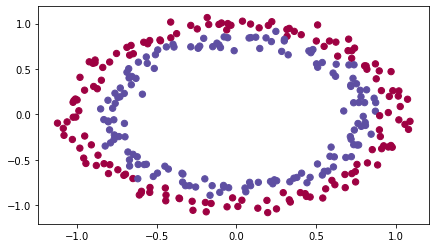

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
from init_utils import sigmoid, relu, compute_loss, forward_propagation, backward_propagation
from init_utils import update_parameters, predict, load_dataset, plot_decision_boundary, predict_dec

%matplotlib inline
plt.rcParams["figure.figsize"] = (7.0, 4.0)
plt.rcParams["image.interpolation"] = "nearest"
plt.rcParams["image.cmap"] = "gray"

train_X, train_Y, test_X, test_Y = load_dataset()

你需要一个分类器去区分蓝点和红点

## 1 - 神经网络模型

In [2]:
def model(X, Y, lr=0.01, num_iter=15000, initialization="he"):
    grads = {}
    costs = []
    m = X.shape[1]
    layers_dims = [X.shape[0], 10, 5, 1]

    if initialization == "zeros":
        parameters = initialize_parameters_zeros(layers_dims)
    elif initialization == "random":
        parameters = initialize_parameters_random(layers_dims)
    elif initialization == "he":
        parameters = initialize_parameters_he(layers_dims)

    for i in range(num_iter):
        a3, cache = forward_propagation(X, parameters)
        cost = compute_loss(a3, Y)
        grads = backward_propagation(X, Y, cache)
        parameters = update_parameters(parameters, grads, lr)
        if i % 1000 == 0:
            print("Cost after iteration {}:{}".format(i, cost))
            costs.append(cost)

    plt.plot(costs)
    plt.ylabel("cost")
    plt.xlabel("iterations (per hundreds)")
    plt.title("lr = "+str(lr))
    plt.show()

    return parameters

## 2 - Zero initialization

在神经网络中有两种类型的参数需要去初始化：
- the weight matrices $(W^{[1]}, W^{[2]}, W^{[3]}, ..., W^{[L-1]}, W^{[L]})$
- the bias vectors $(b^{[1]}, b^{[2]}, b^{[3]}, ..., b^{[L-1]}, b^{[L]})$

**Exercise**: 执行以下函数将所有参数初始化为零。稍后你会看到，它的效果并不好，因为它不能破坏模型的对称性。但我们还是去尝试一下，看看到底发生了什么. Use np.zeros((..,..)) with the correct shapes.

In [3]:
def initialize_parameters_zeros(layers_dims):
    parameters = {}
    L = len(layers_dims)

    for l in range(1, L):
        parameters["W" + str(l)] = np.zeros((layers_dims[l], layers_dims[l-1]))
        parameters["b" + str(l)] = 0
    return parameters

In [4]:
parameters = initialize_parameters_zeros([3,2,1])
print("W1 = ", parameters["W1"])
print("b1 = ", parameters["b1"])
print("W2 = ", parameters["W2"])
print("b2 = ", parameters["b2"])

W1 =  [[0. 0. 0.]
 [0. 0. 0.]]
b1 =  0
W2 =  [[0. 0.]]
b2 =  0


运行下面的代码，使用零初始化将你的模型迭代15,000次.

Cost after iteration 0:0.6931471805599453
Cost after iteration 1000:0.6931471805599453
Cost after iteration 2000:0.6931471805599453
Cost after iteration 3000:0.6931471805599453
Cost after iteration 4000:0.6931471805599453
Cost after iteration 5000:0.6931471805599453
Cost after iteration 6000:0.6931471805599453
Cost after iteration 7000:0.6931471805599453
Cost after iteration 8000:0.6931471805599453
Cost after iteration 9000:0.6931471805599453
Cost after iteration 10000:0.6931471805599455
Cost after iteration 11000:0.6931471805599453
Cost after iteration 12000:0.6931471805599453
Cost after iteration 13000:0.6931471805599453
Cost after iteration 14000:0.6931471805599453


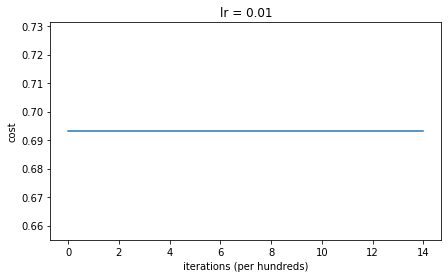

On the train set:
Accuracy: 0.5
On the test set:
Accuracy: 0.5


In [5]:
parameters = model(train_X, train_Y, initialization="zeros")
print ("On the train set:")
predictions_train = predict(train_X, train_Y, parameters)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)

性能非常糟糕，cost 并没有真正降低，算法也没有比随机猜测更好。为什么？让我们看看预测和决策边界的细节：

In [6]:
print("predictions_train = ", predictions_train)
print("predictions_test = ", predictions_test)

predictions_train =  [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0]]
predictions_test =  [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]


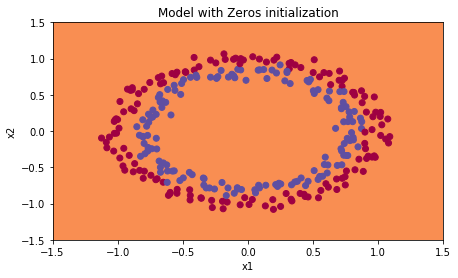

In [7]:
plt.title("Model with Zeros initialization")
axes = plt.gca()
axes.set_xlim([-1.5,1.5])
axes.set_ylim([-1.5,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, np.squeeze(train_Y))

模型将每个样例都预测为了0.

一般来说，将所有权重初始化为零将导致网络无法破坏对称性。这意味着每一层的每个神经元都会学到相同的东西, and you might as well be training a neural network with $n^{[l]}=1$ for every layer, 网络并不比线性分类器如逻辑回归更强大. 

## 3 - 随机初始化

为了打破对称，需要随机初始化权重。随机初始化后，每个神经元可以继续学习其输入的不同功能。在这个练习中，你会看到如果权重被初始化为很大的值将会发生什么。

**Exercise**: 执行以下函数，将权重初始化为较大的随机值(scaled by \*10) and your biases to zeros. Use `np.random.randn(..,..) * 10` for weights and `np.zeros((.., ..))` for biases. 我们使用一个固定的 `np.random.seed(..)` 以确保您的“随机”权重和我们的相匹配。所以不用担心，无论你运行多少次，你得到的始终是相同的参数初始值。

In [18]:
def initialize_parameters_random(layers_dims):
    np.random.seed(3)
    parameters = {}
    L = len(layers_dims)
    for l in range(1, L):
        parameters["W"+str(l)] = np.random.randn(layers_dims[l], layers_dims[l-1])*1
        parameters["b"+str(l)] = np.zeros((layers_dims[l], 1))
    return parameters

In [19]:
# 测试一下
parameters = initialize_parameters_random([3,2,1])
print("W1 = ", parameters["W1"])
print("b1 = ", parameters["b1"])
print("W2 = ", parameters["W2"])
print("b2 = ", parameters["b2"])

W1 =  [[ 1.78862847  0.43650985  0.09649747]
 [-1.8634927  -0.2773882  -0.35475898]]
b1 =  [[0.]
 [0.]]
W2 =  [[-0.08274148 -0.62700068]]
b2 =  [[0.]]


Cost after iteration 0:1.9698193182646349
Cost after iteration 1000:0.6894749458317238
Cost after iteration 2000:0.675058063210226
Cost after iteration 3000:0.6469210868251528
Cost after iteration 4000:0.5398790761260325
Cost after iteration 5000:0.40626422697648495
Cost after iteration 6000:0.2984470886875947
Cost after iteration 7000:0.22183734662094862
Cost after iteration 8000:0.16926424179038072
Cost after iteration 9000:0.1341330896982709
Cost after iteration 10000:0.10873865543082414
Cost after iteration 11000:0.0916944306812697
Cost after iteration 12000:0.07991173603998081
Cost after iteration 13000:0.07083949901112582
Cost after iteration 14000:0.06370209022580516


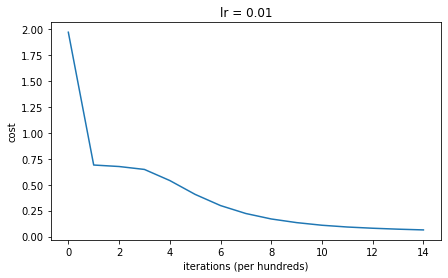

Accuracy: 0.9966666666666667
Accuracy: 0.96


In [20]:
parameters = model(train_X, train_Y, initialization="random")
predictions_train = predict(train_X, train_Y, parameters)
predictions_test = predict(test_X, test_Y, parameters)

If you see "inf" as the cost after the iteration 0, this is because of numerical roundoff（这是因为数值舍入）; 一个更复杂的实现可以解决这个问题，但这和我们的目的相关不大所以无需理会。

不管怎样，模型看起来已经失去了对称性，它给出了更好的结果。相比以前，它不会输出全0。

In [21]:
print (predictions_train)
print (predictions_test)

[[1 0 1 1 0 0 1 0 1 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 1 1 0 1 1 0 0 0
  0 1 0 1 1 1 1 0 0 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 1 1 0 1 0 1 0 1 0 1 1 0
  0 0 0 0 1 0 0 0 1 0 1 0 0 1 1 1 1 1 1 0 0 0 1 1 0 1 1 0 1 0 0 1 0 1 1 0
  0 0 1 1 0 0 1 0 0 1 1 0 1 1 1 0 0 0 0 1 0 1 1 0 1 1 1 1 0 1 1 0 0 0 0 0
  0 0 1 0 1 0 1 0 1 1 1 0 0 1 1 0 1 0 1 1 0 1 0 1 1 0 1 0 1 1 0 1 0 0 1 0
  1 0 0 0 1 0 1 1 1 0 0 1 1 0 0 1 0 1 0 0 1 0 1 1 0 1 1 1 1 0 1 0 1 0 0 1
  0 1 0 0 0 1 1 1 1 0 1 0 0 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 0 0 0 1 1 0 1 0
  1 1 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 1 1 0 0 1 1 1 1
  1 1 1 0 0 0 0 1 1 0 1 0]]
[[1 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 1 1 1 1 0 1 0 0 1
  0 1 1 0 0 1 1 1 1 0 0 0 1 1 0 1 0 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0
  1 1 1 1 0 0 1 1 0 1 0 0 0 0 1 0 1 1 0 0 0 1 1 0 0 0 0 0]]


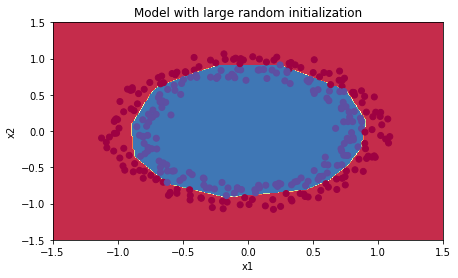

In [22]:
plt.title("Model with large random initialization")
axes = plt.gca()
axes.set_xlim([-1.5, 1.5])
axes.set_ylim([-1.5, 1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

## 4 - He初始化

Finally, try "He Initialization"; this is named for the first author of He et al., 2015. (If you have heard of "Xavier initialization", this is similar except Xavier initialization uses a scaling factor for the weights $W^{[l]}$ of `sqrt(1./layers_dims[l-1])` where He initialization would use `sqrt(2./layers_dims[l-1])`.)

**Exercise**: 执行以下函数，用 “He initialization”去初始化你的参数

**Hint**: 该功能与上一个 `initialize_parameters_random(...)`类似. 唯一的区别是，不是用 `np.random.randn(..,..)`去乘以10, 而是去乘以 $\sqrt{\frac{2}{\text{dimension of the previous layer}}}$ which is what He initialization recommends for layers with a ReLU activation. 

In [23]:
def initialize_parameters_he(layer_dims):
    np.random.seed(3)
    parameters = {}
    L = len(layer_dims) - 1
    for l in range(1, L+1):
        parameters["W"+str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1])*np.sqrt(2/layer_dims[l-1])
        parameters["b"+str(l)] = np.zeros((layer_dims[l],1))
    return parameters

In [24]:
# 测试一下
parameters = initialize_parameters_he([2,4,1])
print("W1 = ", parameters["W1"])
print("b1 = ", parameters["b1"])
print("W2 = ", parameters["W2"])
print("b2 = ", parameters["b2"])

W1 =  [[ 1.78862847  0.43650985]
 [ 0.09649747 -1.8634927 ]
 [-0.2773882  -0.35475898]
 [-0.08274148 -0.62700068]]
b1 =  [[0.]
 [0.]
 [0.]
 [0.]]
W2 =  [[-0.03098412 -0.33744411 -0.92904268  0.62552248]]
b2 =  [[0.]]


Cost after iteration 0:0.8830537463419761
Cost after iteration 1000:0.6879825919728063
Cost after iteration 2000:0.6751286264523371
Cost after iteration 3000:0.6526117768893807
Cost after iteration 4000:0.6082958970572937
Cost after iteration 5000:0.5304944491717495
Cost after iteration 6000:0.4138645817071793
Cost after iteration 7000:0.3117803464844441
Cost after iteration 8000:0.23696215330322556
Cost after iteration 9000:0.18597287209206828
Cost after iteration 10000:0.15015556280371808
Cost after iteration 11000:0.12325079292273548
Cost after iteration 12000:0.09917746546525937
Cost after iteration 13000:0.08457055954024274
Cost after iteration 14000:0.07357895962677366


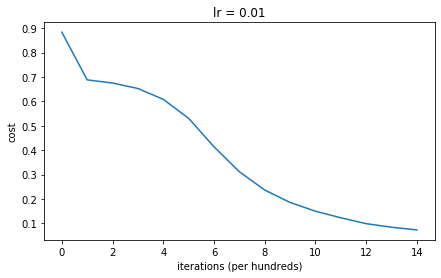

Accuracy: 0.9933333333333333
Accuracy: 0.96


In [25]:
# 训练模型
parameters = model(train_X, train_Y, initialization="he")
# 预测准确率
predictions_train = predict(train_X, train_Y, parameters)
predictions_test = predict(test_X, test_Y, parameters)

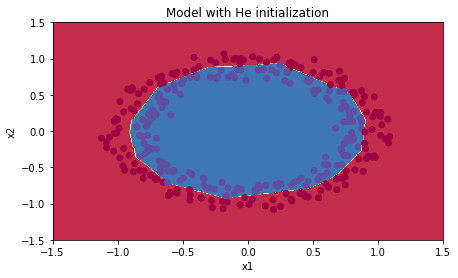

In [26]:
# 绘制决策边界
plt.title("Model with He initialization")
axes = plt.gca()
axes.set_xlim([-1.5,1.5])
axes.set_ylim([-1.5,1.5])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

## 5 - Conclusions
你已经看到了三种不同类型的初始化.
- 不同的初始化导致不同的结果
- 随机初始化用于破坏对称性，并确保不同的隐藏单元可以学习不同的东西
- 不要初始化太大的值
- "He initialization"适用于ReLU激活的网络